## Minería de Datos (Wine)
- Nombre: Felipe Alexander Correa Rodríguez
- Fecha de Entrega: 29 de Abril de 2022

## Objetivos
- Repaso Python
- Uso de colaboratory y entrega de informes basado en colaboratory
- Introducción librerías numpy y python
- Introducción de librerías matplotlib para generar gráficos
- Introducción manejo de datos, calculos de estadisticas básicas
- Análisis de métricas de distancia

# Introducción

La base de datos a utilizar ha sido extraída de: http://archive.ics.uci.edu/ml/index.php 

El dataset esta compuesto por dos archivos llamados winequality-red.csv y winequality-white.csv.

Las variables del dataset representan:

- acidez fija
- acidez volátil
- ácido cítrico
- azúcar residual
- cloruros
- anhídrido sulfuroso libre
- anhídrido sulfuroso total
- densidad
- pH
- sulfatos
- alcohol
- calidad

Partimos por setear librerías y directorios,

- Acceder a los datos del Drive:

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


- Se establecen las librerías:

In [8]:
import pandas
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np
from numpy import matrix # Importamos matriz del módulo numpy.
import math
import scipy as sp
from scipy.spatial.distance import pdist, squareform
import seaborn as seab #para graficos
%matplotlib inline

## Parte 1: Carga de Datos y Análisis preliminar

A continuación se entregará el cálculo de las estadísticas básicas de los datos. Lo anterior para cada conjunto (vinos tintos y blancos).

- Se determinará la cantidad de instancias (número de muestras) en cada dataset.
- Cuantos y cuáles son los atributos (columnas) de los set de datos.
- Se calcula el valor promedio, medio, mínimo, máximo y desviación estandar de cada uno de los atributos (esto implementando y comparando con las funciones por defecto pandas o numpy).
- Se investiga y explica la matriz de covarianza entre los atributos del dataset.

Se realizará el trabajo de un conjunto primero y luego el otro. 

Se empezará por el 'Vino Tinto' que sería winequality-red.

### **Vino Tinto:**

La tabla de datos estará presente en la carpeta de colab de google drive, esto es pues así mismo se realizó y testeó cada parte del presente trabajo.

- Se establecen los archivos de lectura y preliminares:

In [9]:
#Cargar archivos
datB = read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv',sep=";")
#Database definida en matriz
MB = matrix(datB)
print("size matrix: ",MB.shape,"Type datB : ", type(datB), "Type MB : ", type(MB))
[rows,column]=MB.shape
print("Filas :",rows,"Columnas :",column)

size matrix:  (1599, 12) Type datB :  <class 'pandas.core.frame.DataFrame'> Type MB :  <class 'numpy.matrix'>
Filas : 1599 Columnas : 12


Vemos que hay un total de 1599 filas y 12 columnas.

Luego veremos cuáles son los atributos que trabaja la tabla, esto es:

In [10]:
datB.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

Viendo los valores recibidos, podemos confirmar con los que se mencionan en el enunciado de este trabajo.

- Se realiza lectura de las tablas:

Ocupamos head() cuyo valor por default n es 5. Esta función devuelve las primeras n filas del objeto según la posición. Es útil para probar rápidamente si la tabla objeto tiene el tipo correcto de datos, para trabajar con ellos o depurar la tabla.

In [11]:
datB.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Efectivamente, no hay problemas. Luego de comprobar, hacemos print al total de datB para poder contar con el número de instancias, y después de esto se analizará con más detalles a través de otras funcionalidades.

**Mayor exploración y medidas de tendencia:**

In [12]:
print(datB)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

De lo anterior, podemos ver que hay 12 columnas donde los atributos son:
acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, anhídrido sulfuroso libre, anhídrido sulfuroso total, densidad, pH, sulfatos, alcohol, calidad.

Los dataset cuentan con 1599 muestras, esto se puede observar tanto al cargar datB a través de un print o también a través de las funciones info() y/o describe(). También podremos notar que los valores de todos los atributos son float a excepción de la 'calidad' donde son enteros, esto se puede comprar a través de las siguientes funciones:

- Funcionalidades para análisis de los datos:

In [13]:
datB.info()
datB.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Se puede notar el cálculo de la media, el conteo de muestras, mínimos y máximos, además de otros detalles. Por lo que se procederá a comparar con funciones implementadas desde 0 y ver diferencias o salvedades respecto de lo que ofrece numpy o panda:

In [14]:
#Generamos listas de los atributos,
#Con estas listas podremos operar con los valores de cada columna por separado.
acidezfija1 = datB["fixed acidity"].tolist()
acidezvolatil1 = datB["volatile acidity"].tolist()
acidocitrico1 = datB["citric acid"].tolist()
azucaresidual1 = datB["residual sugar"].tolist()
cloruros1 = datB["chlorides"].tolist()
sulfurosolibre1 = datB["free sulfur dioxide"].tolist()
sulfurosototal1 = datB["total sulfur dioxide"].tolist()
densidad1 = datB["density"].tolist()
pH1 = datB["pH"].tolist()
sulfatos1 = datB["sulphates"].tolist()
alcohol1 = datB["alcohol"].tolist()
calidad1 = datB["quality"].tolist()

In [15]:
#Calculo de medidas de tendencia por implementacion.
print("Acidez fija:")
#La media hecha a través de fórmula
print("La media seria =",sum(acidezfija1) / len(acidezfija1));
#La mediana o valor medio
def mediana(data):
    data.sort() #Se ordenan los datos
    mid = len(data) // 2 #Busca de valor medio
    return (data[mid] + data[~mid]) / 2 #Devuelve el valor
print("La mediana seria =", mediana(acidezfija1));
#El valor minimo
print("El valor minimo seria =", min(acidezfija1))
#El valor maximo
print("El valor maximo seria =", max(acidezfija1))
#La desviacion estandar(desde la varianza)
def varianza(data):
    n = len(data) #Numero de muestras
    media = sum(data) / n #La media de las muestras
    desvia = [(x - media) ** 2 for x in data] #Cuadrados
    varianza = sum(desvia) / n #Varianza
    return varianza
print("La varianza seria =", varianza(acidezfija1));
def devest(data):
    var = varianza(data)
    desviacion = math.sqrt(var)
    return desviacion 
print("La desviacion estandar seria =", devest(acidezfija1));

Acidez fija:
La media seria = 8.319637273295838
La mediana seria = 7.9
El valor minimo seria = 4.6
El valor maximo seria = 15.9
La varianza seria = 3.029520568867097
La desviacion estandar seria = 1.7405518001102689


In [16]:
print("Acidez volatil:")
#La media hecha a través de fórmula
print("La media seria =",sum(acidezvolatil1) / len(acidezvolatil1));
#La mediana o valor medio
def mediana(data):
    data.sort() #Se ordenan los datos
    mid = len(data) // 2 #Busca de valor medio
    return (data[mid] + data[~mid]) / 2 #Devuelve el valor
print("La mediana seria =", mediana(acidezvolatil1));
#El valor minimo
print("El valor minimo seria =", min(acidezvolatil1))
#El valor maximo
print("El valor maximo seria =", max(acidezvolatil1))
#La desviacion estandar
def varianza(data):
    n = len(data) #Numero de muestras
    media = sum(data) / n #La media de las muestras
    desvia = [(x - media) ** 2 for x in data] #Cuadrados
    varianza = sum(desvia) / n #Varianza
    return varianza
print("La varianza seria =", varianza(acidezvolatil1));
def devest(data):
    var = varianza(data)
    desviacion = math.sqrt(var)
    return desviacion 
print("La desviacion estandar seria =", devest(acidezvolatil1));

Acidez volatil:
La media seria = 0.5278205128205131
La mediana seria = 0.52
El valor minimo seria = 0.12
El valor maximo seria = 1.58
La varianza seria = 0.03204232613332038
La desviacion estandar seria = 0.1790037042446898


In [17]:
print("Acido cítrico:")
#La media hecha a través de fórmula
print("La media seria =",sum(acidocitrico1) / len(acidocitrico1));
#La mediana o valor medio
def mediana(data):
    data.sort() #Se ordenan los datos
    mid = len(data) // 2 #Busca de valor medio
    return (data[mid] + data[~mid]) / 2 #Devuelve el valor
print("La mediana seria =", mediana(acidocitrico1));
#El valor minimo
print("El valor minimo seria =", min(acidocitrico1))
#El valor maximo
print("El valor maximo seria =", max(acidocitrico1))
#La desviacion estandar
def varianza(data):
    n = len(data) #Numero de muestras
    media = sum(data) / n #La media de las muestras
    desvia = [(x - media) ** 2 for x in data] #Cuadrados
    varianza = sum(desvia) / n #Varianza
    return varianza
print("La varianza seria =", varianza(acidocitrico1));
def devest(data):
    var = varianza(data)
    desviacion = math.sqrt(var)
    return desviacion 
print("La desviacion estandar seria =", devest(acidocitrico1));
print(" ");
print("Y así repetimos el proceso hasta completar cada atributo...");

Acido cítrico:
La media seria = 0.2709756097560964
La mediana seria = 0.26
El valor minimo seria = 0.0
El valor maximo seria = 1.0
La varianza seria = 0.037923751124940966
La desviacion estandar seria = 0.19474021445233383
 
Y así repetimos el proceso hasta completar cada atributo...


Podríamos seguir realizando el proceso con cada atributo, pero ya se puede notar que los valores son correspondientes a los obtenidos mediante las funciones de panda y numpy.

Además, teniendo solamente el valor de la acidez fija, podemos notar que haciéndolo manualmente tendremos quizás más libertades al momento de cuidar el código o mayor precisión decimal por default, pero al mismo tiempo, panda/numpy por default lograron sacar y presentar mejor las informaciones de media, mediana y otros en 0.283 según el hardware de prueba, versus 0.300 o un poco más al sacar solamente la acidez fija. Lo anterior demuestra una muy buena implementación y que también, a bajo nivel de cálculo, no hay mucha diferencia.

**COVARIANZA DE VINO TINTO:**

Llegando al último punto de la primera parte del enunciado, primero se realizará todo el aparataje de código y luego se explicará tanto la idea de la covarianza, como lo encontrado después de su obtención.

Ahora procederemos a la revisión de la covarianza entre atributos de la tabla:

In [18]:
datB.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


Ahora, para encontrar la matriz de covarianza de una forma en que nos entregue información, primero separamos las muestras de nuestro dataframe en matrices.
Para lo anterior generaremos una matriz de 12 columnas de los datos y esta la recorreremos tal de dar los valores necesarios, luego con seaborn graficaremos y utilizando colores podremos ver las correlaciones de los 

Podrías separar etiquetas de valores en el caso de que así sea, esto a través de iloc.

In [19]:
X = datB.iloc[:,0:12].values

Habiendo hecho eso, podemos comprobar la matriz:

In [20]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

Luego aplicamos shape para ver cuál es el formato de la array y comprobar:

In [21]:
np.shape(X)

(1599, 12)

Luego, con los datos en matriz, podemos ocuparlos para poder generar nuestra matriz de covarianza.

Matriz de covarianza 
[[ 1.00062578 -0.25629118  0.67212377  0.11484855  0.09376383 -0.15389043
  -0.11325227  0.66846534 -0.68340559  0.18312019 -0.06170686  0.12412928]
 [-0.25629118  1.00062578 -0.55284143  0.00191908  0.06133613 -0.0105104
   0.07651786  0.02204002  0.23508431 -0.26115001 -0.20241462 -0.39080218]
 [ 0.67212377 -0.55284143  1.00062578  0.14366701  0.20395046 -0.06101629
   0.03555526  0.36517555 -0.54224326  0.31296577  0.10997202  0.22651417]
 [ 0.11484855  0.00191908  0.14366701  1.00062578  0.05564433  0.18716605
   0.20315493  0.3555057  -0.08570602  0.00553058  0.04210177  0.01374023]
 [ 0.09376383  0.06133613  0.20395046  0.05564433  1.00062578  0.00556563
   0.04743013  0.20075788 -0.26519198  0.37149281 -0.22127893 -0.12898723]
 [-0.15389043 -0.0105104  -0.06101629  0.18716605  0.00556563  1.00062578
   0.66808426 -0.02195956  0.07042154  0.0516899  -0.06945179 -0.05068776]
 [-0.11325227  0.07651786  0.03555526  0.20315493  0.04743013  0.66808426
   1.000625

Text(0.5, 1.0, 'Correlaciones a través de matriz de covarianza')

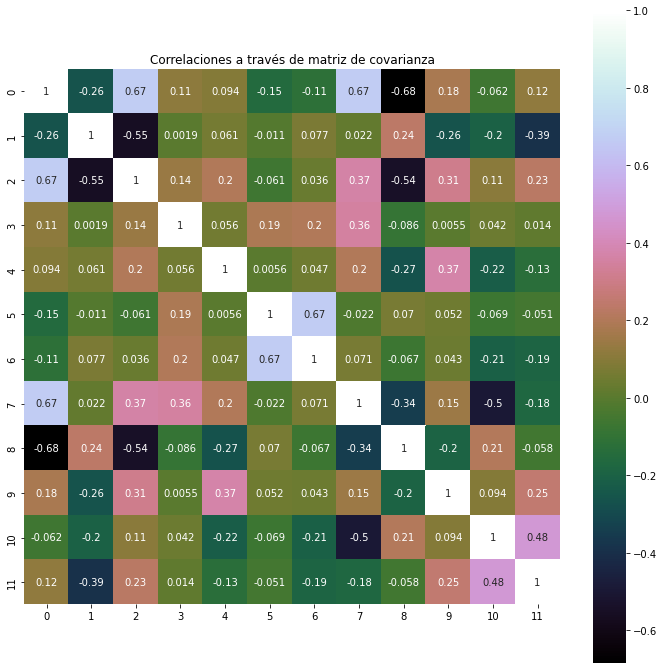

In [22]:
#Primero se estandarizan los datos, o sea se cambia a media 0 y desviación 1
#con lo anterior se evitan errores al parecerse a una distribución normal.
from sklearn.preprocessing import StandardScaler
X_estandarizado = StandardScaler().fit_transform(X)

#Realización de la matriz de covarianza de datos estandarizados:
mediaesta = np.mean(X_estandarizado, axis=0)
matcovarianza = (X_estandarizado - mediaesta).T.dot((X_estandarizado - mediaesta)) / (X_estandarizado.shape[0]-1)
print('Matriz de covarianza \n%s' %matcovarianza)

#Se ocupa seaborn para los gráficos
plt.figure(figsize=(12,12))
seab.heatmap(matcovarianza, vmax=1, square=True,annot=True,cmap='cubehelix')
#Título impuesto
plt.title('Correlaciones a través de matriz de covarianza')

Y confirmando a través de una matriz correlación, aplicada a los datos base.

Text(0.5, 1.0, 'Correlaciones a través de matriz de correlación')

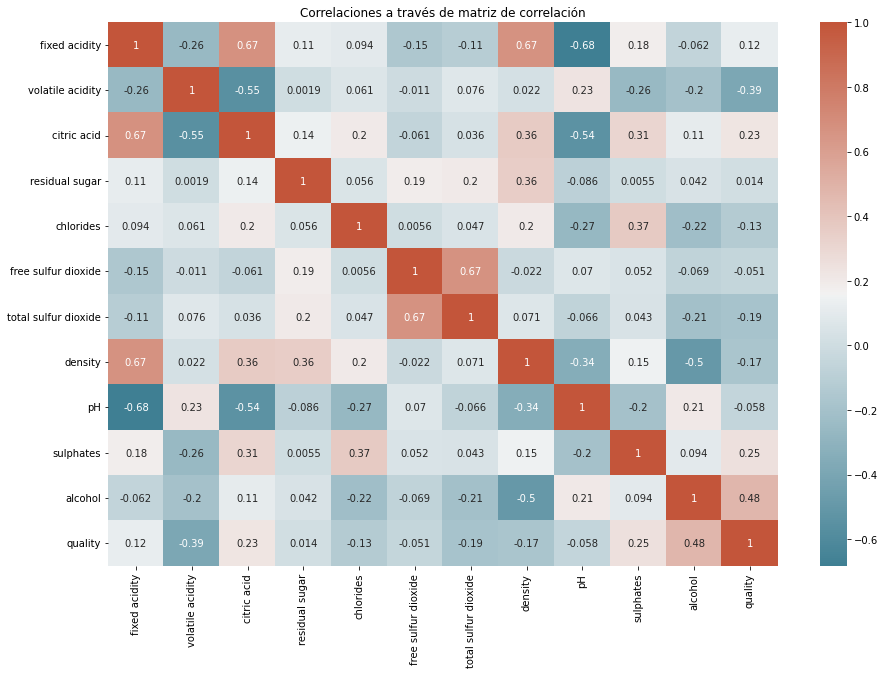

In [23]:
corr = datB.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
seab.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=seab.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlaciones a través de matriz de correlación')

**Explicación específica:**
La covarianza es una medida bastante intuitiva que se refiere a cuánto cambian dos variables juntas, en este caso sería la conjunción o compatibilidad entre valores de atributos distintos, si tienden a subir o a funcionar de manera desigual. Por su lado, la varianza es solo el rango en el que varía una medida o variable, esto es cuánto más o menos lejos está de una media o intervalo.

A partir de lo anterior, podemos inferir que una matriz de covarianza sería realizar aquellas correlaciones entre, por ejemplo, los atributos de toda una tabla... Y eso es lo que se hizo aquí, tal como ver un sensor de temperatura, las correlaciones que hay entre los atributos.

Leer la matriz o el gráfico final hecho a través de seaborn, nos permite ver númericamente y con color el grado de correlación que hay. Númericamente se trataría de -1 a 1, los valores positivos indican una relación linear y los negativos una relación inversa. El color sería azúl a rojo en el caso del gráfico de la matriz de correlación, siendo azúl igual a poca correlación y rojo bastante. Los 1 que se leen sería cada atributo consigo mismo.

Hay que destacar que la lectura se hace frente a la covarianza de valor normalizado, por sí misma no nos dice mucho o es difícil de leer, por su lado, la normalizada es básicamente un coeficiente de correlación.

Entonces, atendiendo a lo obtenido, podemos notar que hay atributos con alto valor de correlacion y que podrían servir para realizar un modelo de predicción. Por ejemplo, si leemos para el caso de qué influye o se correlaciona con calidad, tendremos que el nivel de alcohol, la acidez volatil y sulfatos o la acidez fija pueden ser relacionados puesto a que los valores son cercanos a '1'. Lo anterior nos abriría la idea de generar un modelo predictivo sobre la calidad de 'X' vino tinto según su nivel o características de acidez u otros detalles que lo conformen y se correlacionen, asimismo podemos analizar otros atributos 

### **Vino Blanco:**

In [24]:
#Cargar archivos
datA = read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv',sep=";")
MA = matrix(datA)
print("size matrix: ",MA.shape,"Type datA : ", type(datA), "Type MA : ", type(MA))
[rows,column]=MA.shape
print("Filas :",rows,"Columnas :",column)

size matrix:  (4898, 12) Type datA :  <class 'pandas.core.frame.DataFrame'> Type MA :  <class 'numpy.matrix'>
Filas : 4898 Columnas : 12


Nótese que a diferencia del vino tinto, el vino blanco posee 4898 filas por 12 columnas.
Mientras, sus atributos serían:

In [25]:
datA.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

Los atributos serían tal cual los del vino tinto.

Vemos la tabla realizando un print.

In [26]:
print(datA)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

Confirmando, similar al caso del vino tinto, podemos ver que hay 12 columnas donde los atributos son:
acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, anhídrido sulfuroso libre, anhídrido sulfuroso total, densidad, pH, sulfatos, alcohol, calidad.

A diferencia del vino tinto, aquí se cuentan con 4898 muestras por cada atributo, esto se puede observar tanto al cargar 'datA' a través de un print o también a través de las funciones info() y/o describe(). También podemos notar que los valores de todos los atributos son float a excepción de la 'calidad' donde son enteros.

Aplicamos funciones para un análisis exhaustivo del tipo de datos y otros detalles.

**Detalles y medidas de tendencia:**

In [27]:
datA.info()
datA.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Nuevamente, confirmamos a través de la implementación de funciones propias para notar si los datos y especificaciones se cumplen.

In [28]:
#Generamos listas de los atributos,
#Con estas listas podremos operar con los valores de cada columna por separado.
acidezfija2 = datA["fixed acidity"].tolist()
acidezvolatil2 = datA["volatile acidity"].tolist()
acidocitrico2 = datA["citric acid"].tolist()
azucaresidual2 = datA["residual sugar"].tolist()
cloruros2 = datA["chlorides"].tolist()
sulfurosolibre2 = datA["free sulfur dioxide"].tolist()
sulfurosototal2 = datA["total sulfur dioxide"].tolist()
densidad2 = datA["density"].tolist()
pH2 = datA["pH"].tolist()
sulfatos2 = datA["sulphates"].tolist()
alcohol2 = datA["alcohol"].tolist()
calidad2 = datA["quality"].tolist()

In [29]:
#La media hecha a través de fórmula
print("La media seria =",sum(acidezfija2) / len(acidezfija2)); #Sumatoria de los datos / Numero de datos
#La mediana o valor medio
def mediana(data):
    data.sort() #Se ordenan los datos
    mid = len(data) // 2 #Busca de valor medio
    return (data[mid] + data[~mid]) / 2 #Devuelve el valor
print("La mediana seria =", mediana(acidezfija2));
#El valor minimo
print("El valor minimo seria =", min(acidezfija2))
#El valor maximo
print("El valor maximo seria =", max(acidezfija2))
#La desviacion estandar
def varianza(data):
    n = len(data) #Numero de muestras
    media = sum(data) / n #La media de las muestras
    desvia = [(x - media) ** 2 for x in data] #Cuadrados
    varianza = sum(desvia) / n #Varianza
    return varianza
print("La varianza seria =", varianza(acidezfija2));
def devest(data):
    var = varianza(data)
    desviacion = math.sqrt(var) #Se aplica a la varianza
    return desviacion 
print("La desviacion estandar seria =", devest(acidezfija2));

La media seria = 6.854787668436075
La mediana seria = 6.8
El valor minimo seria = 3.8
El valor maximo seria = 14.2
La varianza seria = 0.7119681970549366
La desviacion estandar seria = 0.8437820791264393


Nuevamente, vemos ya desde el primer caso/atributo que se cumplen todos los valores acorde a lo que entregan las funciones predeterminadas de numpy y panda.

**COVARIANZA DE VINO BLANCO:**

Siguiendo la lógica del vino tinto, se repetirá el proceso antes efectuado, viendo como este soporta al tener una mayor cantidad de filas.

In [30]:
X2 = datA.iloc[:,0:12].values #Tornamos a matriz

In [31]:
np.shape(X2) #Chequeamos que el número de columnas y todo esté en orden.

(4898, 12)

Luego, con la matriz hecha, aplicamos estandarización y operatoria para obtener la matris de covarianza:

Matriz de covarianza 
[[ 1.00020421e+00 -2.27019251e-02  2.89239750e-01  8.90388800e-02
   2.30903579e-02 -4.94059460e-02  9.10883532e-02  2.65385196e-01
  -4.25945254e-01 -1.71464857e-02 -1.20905808e-01 -1.13686041e-01]
 [-2.27019251e-02  1.00020421e+00 -1.49502334e-01  6.42991877e-02
   7.05259704e-02 -9.70317498e-02  8.92787311e-02  2.71193823e-02
  -3.19218856e-02 -3.57354428e-02  6.77317712e-02 -1.94762733e-01]
 [ 2.89239750e-01 -1.49502334e-01  1.00020421e+00  9.42308629e-02
   1.14387802e-01  9.40964322e-02  1.21155533e-01  1.49533100e-01
  -1.63781650e-01  6.23436687e-02 -7.57441944e-02 -9.21097144e-03]
 [ 8.90388800e-02  6.42991877e-02  9.42308629e-02  1.00020421e+00
   8.87026459e-02  2.99159432e-01  4.01521288e-01  8.39137777e-01
  -1.94173097e-01 -2.66698109e-02 -4.50723244e-01 -9.75967547e-02]
 [ 2.30903579e-02  7.05259704e-02  1.14387802e-01  8.87026459e-02
   1.00020421e+00  1.01413057e-01  1.98950918e-01  2.57263845e-01
  -9.04579243e-02  1.67663068e-02 -3.60262265e-01 

Text(0.5, 1.0, 'Correlaciones a través de matriz de covarianza')

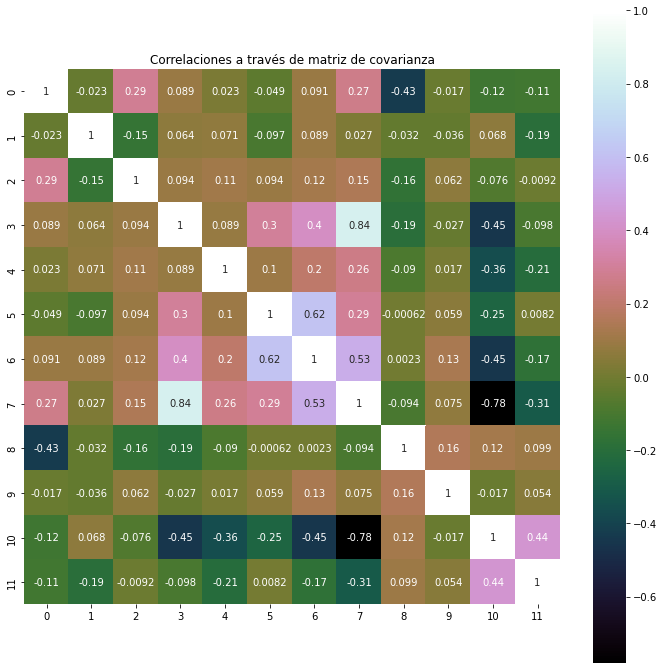

In [32]:
#Primero se estandarizan los datos, o sea se cambia a media 0 y desviación 1
#con lo anterior se evitan errores al parecerse a una distribución normal.
from sklearn.preprocessing import StandardScaler
X_estandarizado2 = StandardScaler().fit_transform(X2)

#Realización de la matriz de covarianza de datos estandarizados:
mediaesta2 = np.mean(X_estandarizado2, axis=0)
matcovarianza2 = (X_estandarizado2 - mediaesta2).T.dot((X_estandarizado2 - mediaesta2)) / (X_estandarizado2.shape[0]-1)
print('Matriz de covarianza \n%s' %matcovarianza2)

#Se ocupa seaborn para los gráficos
plt.figure(figsize=(12,12))
seab.heatmap(matcovarianza2, vmax=1, square=True,annot=True,cmap='cubehelix')
#Título impuesto
plt.title('Correlaciones a través de matriz de covarianza')

Y comprobamos de nuevo con una matriz de correlación que es por defecto:

Text(0.5, 1.0, 'Correlaciones a través de matriz de correlación')

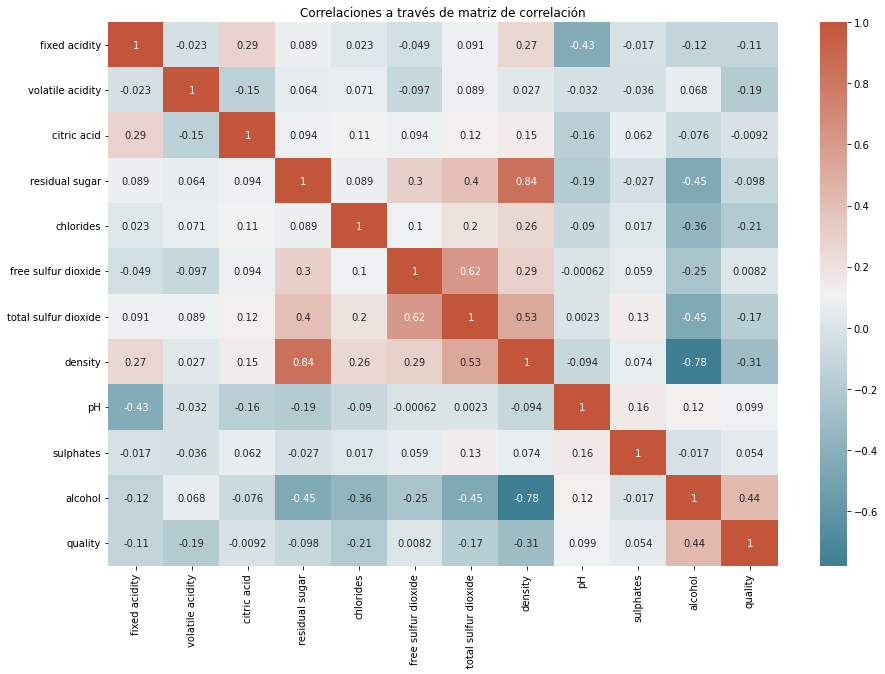

In [33]:
corr2 = datA.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
seab.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, cmap=seab.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlaciones a través de matriz de correlación')

**Resultados y comparaciones:**
Si notamos con detenimiento, existen diferencias entre vino tinto y vino blanco frente a sus correlaciones, esto nos puede indicar una diferente composición para el sabor o calidad entre uno y otro, por ejemplo, la densidad no es tan cercana a '1' para ácido fijo como en el caso del vino tinto, esto es 0.27(vino blanco) vs 0.67(vino tinto).

Por otro lado, las similitudes serían la correlación del alcohol con la calidad, pero dentro de eso mismo, los sulfatos no son tan correlativos frente al caso del vino tinto.

Este tipo de comparaciones nos permite predecir y llegar al núcleo de qué hace diferente a uno del otro, pero al mismo tiempo sus similitudes.

## Parte 2: Gráficos y visualización 

### **Histogramas:**

Primero se inicia implementando una función que entregue tanto el nombre de la columna, el dataframe, lo anterior ocupando un cierto número de bins y tamaño.

En primera instancia y para tener un marco o modelo, aplicaremos las funciones provistas por las bibliotecas y luego se hará de manera hechiza, se compararán ambos resultados y se esperaría lograr un resultado similar de histogramas a los que se pueden hacer con las funciones ya implementadas.

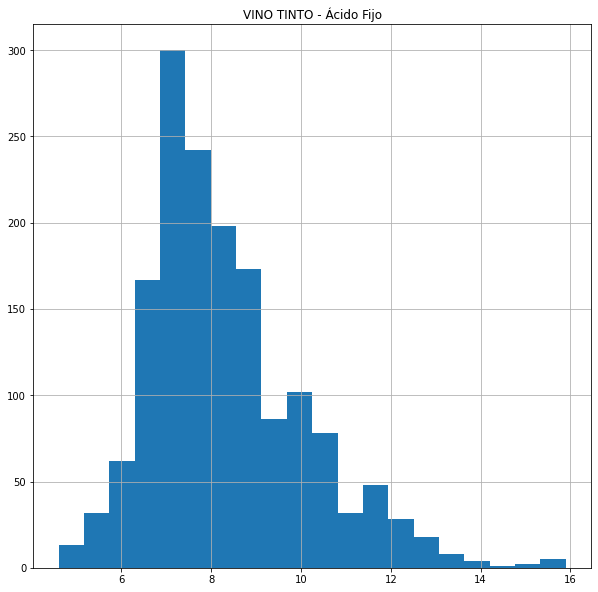

In [34]:
#Funcionalidad para hacer un histograma:
#Vino tinto--
#Podemos escoger cierta columna al escribir el formato: datA["fixed acidity"], 
#donde datB es el dataframe y entre paréntesis iría el atributo como string.
datB["fixed acidity"].hist(bins=20,figsize=(10,10)) #(Número de bins, tamaño de la figura)
#Este caso sería datB, o sea dataframe del vino tinto y acido fijo.
plt.title("VINO TINTO - Ácido Fijo") #Título del atributo/columna.
plt.show() #Se muestra el histograma

Para un caso general de presentar todos los histogramas con el nombre de atributo por default, o sea el nombre de la columna:

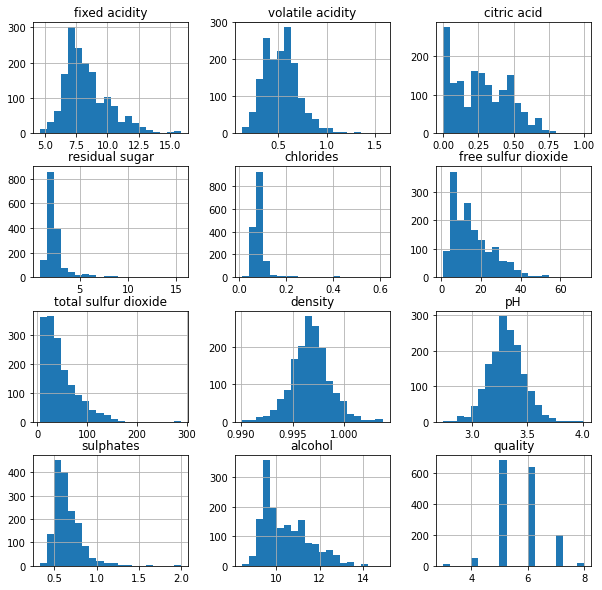

In [35]:
datB.hist(bins=20,figsize=(10,10)) #(Número de bins, tamaño de la figura)
#Este caso sería datB, o sea dataframe del vino tinto y la lectura sería general.
plt.show() #Se muestra el histograma

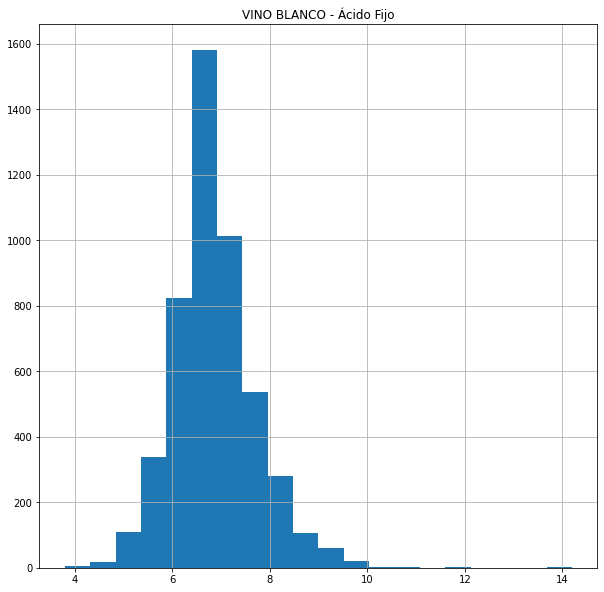

In [36]:
#Funcionalidad para hacer un histograma:
#Vino blanco--
datA["fixed acidity"].hist(bins=20,figsize=(10,10)) #(Número de bins, tamaño de la figura)
#Este caso sería datA, o sea dataframe del vino blanco y acido fijo.
plt.title("VINO BLANCO - Ácido Fijo") #Título del atributo/columna.
plt.show() #Se muestra el histograma

Luego, el caso general de todos los histogramas, esto para el vino blanco:

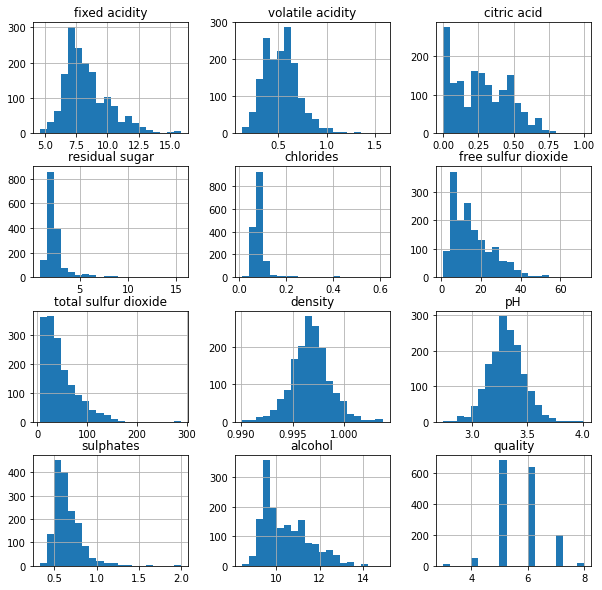

In [37]:
datB.hist(bins=20,figsize=(10,10)) #(Número de bins, tamaño de la figura)
#Este caso sería datB, o sea dataframe del vino tinto y la lectura sería general.
plt.show() #Se muestra el histograma

**Función de implementación manual acorde a enunciado:**

- Veamos el caso del ácido fijo en el 'Vino Tinto':

Array de bins: [ 0.7892482   1.58903399  2.38881979  3.18860558  3.98839137  4.78817716
  5.58796296  6.38774875  7.18753454  7.98732033  8.78710612  9.58689192
 10.38667771 11.1864635  11.98624929 12.78603508 13.58582088 14.38560667
 15.18539246 15.98517825]


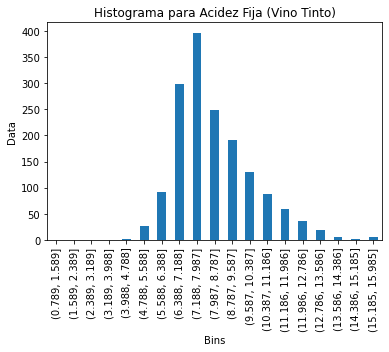

In [38]:
#Implementación de histograma:
def histograma(setdatos,nombrecolumna,nbins):
    #Calculo minimo y maximo de la columna dada:
    mini = min(setdatos) #Valor minimo para el atributo de Acidez Fija
    maxi = max(setdatos) #Valor maximo para el atributo de Acidez Fija
    #nbins = 20 #Numero de bins a calcular según enunciado
    #Realización de los bins:
    bin = maxi-mini/math.sqrt(1599) #diferencia de maximo y minimo / raiz de numero de datos.
    magni = bin/nbins #El tamaño de cada bin
    interbin = np.linspace(magni,bin+1,nbins,endpoint=False) #Array de bordes de cada bin
    total = np.zeros(1599) #Array representante del histograma
    histofal = pd.DataFrame(total) #Se genera como DataFrame para utilizar
    print("Array de bins:", interbin) #Se muestra el array de bins, o sea los que forman el intervalo
    #Separación de los datos de la columna en los bins:
    histofal["atributo"] = setdatos # Se añade columna/atributo de estudio al  histograma de ceros
    histofal["cortes1" + nombrecolumna] = pd.cut(np.array(setdatos),interbin) #Se genera una columna con los cortes
    #Se toma la columna creada y se realiza plot de gráfico de barras
    histofal.groupby("cortes1" + nombrecolumna)["atributo"].count().plot.bar() #Se agrupan y se genera el grafico de barras
    plt.title("Histograma para " + nombrecolumna + " (Vino Tinto)") #Titulo
    plt.xlabel("Bins") #Label general
    plt.ylabel("Data") #Label del atributo
    plt.show() #Se muestra

histograma(acidezfija1,"Acidez Fija",20)   

Podemos notar que el histograma es igual al hecho a través de las funciones predefinidas y optimizadas por librería, lo cual nos indica la veracidad de la realización.

Distribución:

Respecto al histograma conseguido, podemos notar que es de sesgo positivo, o sea hacia la derecha, lo que nos indica una distribución asimétrica, esto sería que la media de los datos es mayor a la mediana, donde la mediana estaría cercana al primer cuartil de datos.

- Ahora analicemos los demás atributos para el conjunto de vino tinto. Los histogramas se generarán a través de la función antes creada y se añadirá el tipo de distribución más cualquier otro detalle a considerar:

Array de bins: [0.07884995 0.20375741 0.32866486 0.45357232 0.57847977 0.70338723
 0.82829469 0.95320214 1.0781096  1.20301705 1.32792451 1.45283196
 1.57773942 1.70264687 1.82755433 1.95246178 2.07736924 2.2022767
 2.32718415 2.45209161]


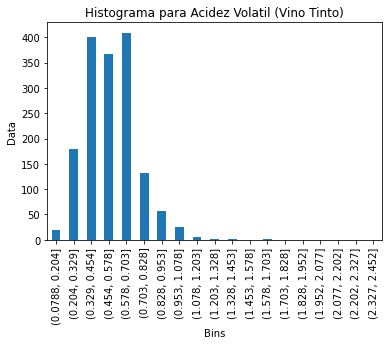

Array de bins: [0.05   0.1475 0.245  0.3425 0.44   0.5375 0.635  0.7325 0.83   0.9275
 1.025  1.1225 1.22   1.3175 1.415  1.5125 1.61   1.7075 1.805  1.9025]


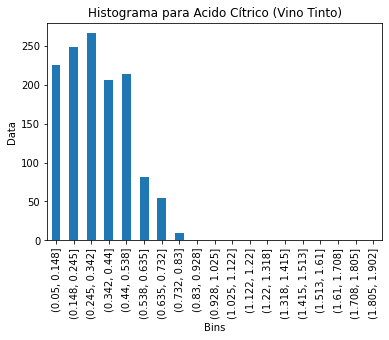

Array de bins: [ 0.77387465  1.55905556  2.34423648  3.1294174   3.91459831  4.69977923
  5.48496014  6.27014106  7.05532198  7.84050289  8.62568381  9.41086472
 10.19604564 10.98122655 11.76640747 12.55158839 13.3367693  14.12195022
 14.90713113 15.69231205]


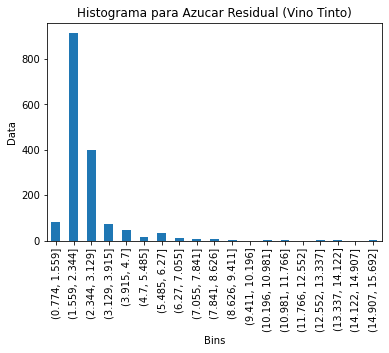

Array de bins: [0.030535   0.10954324 0.18855149 0.26755973 0.34656798 0.42557622
 0.50458447 0.58359271 0.66260096 0.74160921 0.82061745 0.8996257
 0.97863394 1.05764219 1.13665043 1.21565868 1.29466692 1.37367517
 1.45268342 1.53169166]


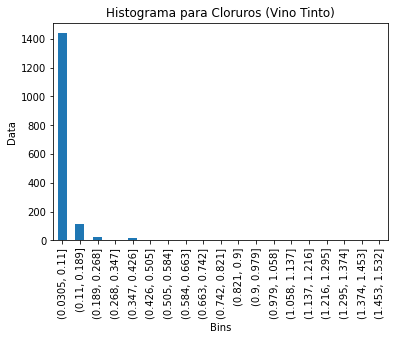

Array de bins: [ 3.59874961  7.06756174 10.53637387 14.005186   17.47399812 20.94281025
 24.41162238 27.88043451 31.34924664 34.81805877 38.2868709  41.75568303
 45.22449515 48.69330728 52.16211941 55.63093154 59.09974367 62.5685558
 66.03736793 69.50618006]


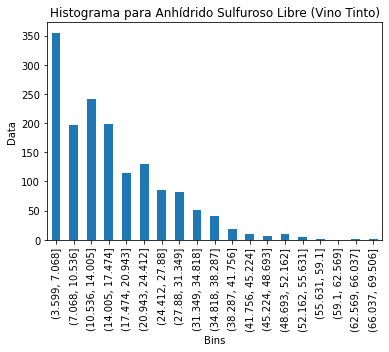

Array de bins: [ 14.44249766  28.21287043  41.9832432   55.75361597  69.52398874
  83.29436152  97.06473429 110.83510706 124.60547983 138.37585261
 152.14622538 165.91659815 179.68697092 193.4573437  207.22771647
 220.99808924 234.76846201 248.53883479 262.30920756 276.07958033]


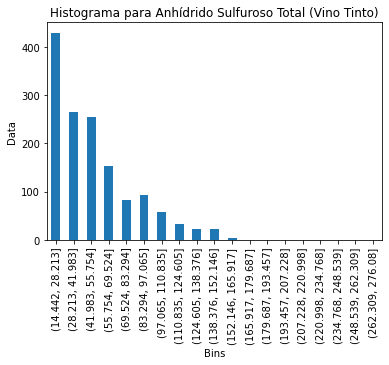

Array de bins: [0.04894653 0.14544572 0.24194492 0.33844412 0.43494332 0.53144252
 0.62794172 0.72444092 0.82094012 0.91743932 1.01393852 1.11043772
 1.20693692 1.30343612 1.39993532 1.49643451 1.59293371 1.68943291
 1.78593211 1.88243131]


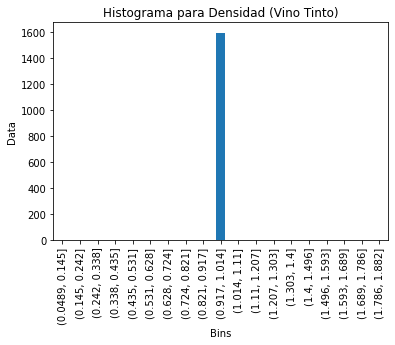

Array de bins: [0.19707393 0.43429416 0.67151439 0.90873463 1.14595486 1.38317509
 1.62039533 1.85761556 2.09483579 2.33205602 2.56927626 2.80649649
 3.04371672 3.28093695 3.51815719 3.75537742 3.99259765 4.22981789
 4.46703812 4.70425835]


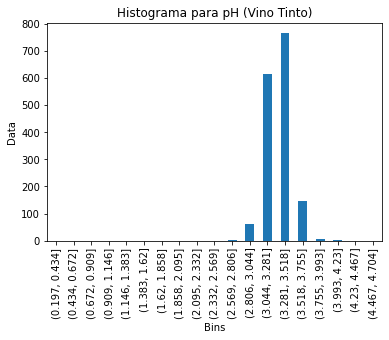

Array de bins: [0.09958737 0.24419537 0.38880338 0.53341138 0.67801938 0.82262738
 0.96723539 1.11184339 1.25645139 1.40105939 1.5456674  1.6902754
 1.8348834  1.9794914  2.12409941 2.26870741 2.41331541 2.55792341
 2.70253142 2.84713942]


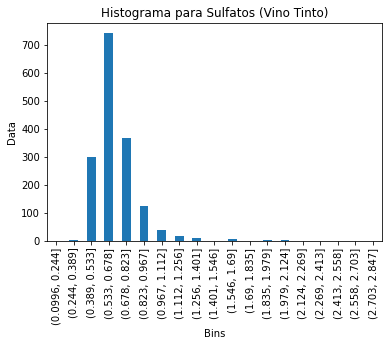

Array de bins: [ 0.73449672  1.4822686   2.23004048  2.97781236  3.72558424  4.47335612
  5.22112801  5.96889989  6.71667177  7.46444365  8.21221553  8.95998741
  9.70775929 10.45553117 11.20330306 11.95107494 12.69884682 13.4466187
 14.19439058 14.94216246]


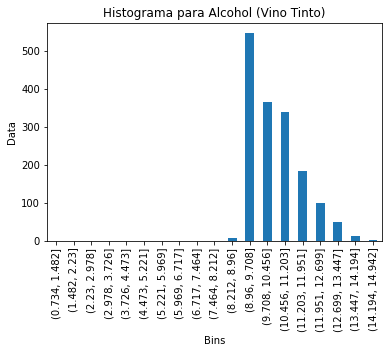

In [39]:
histograma(acidezvolatil1,"Acidez Volatil",20)
histograma(acidocitrico1,"Acido Cítrico",20)   
histograma(azucaresidual1,"Azucar Residual",20)
histograma(cloruros1,"Cloruros",20)
histograma(sulfurosolibre1,"Anhídrido Sulfuroso Libre",20)         
histograma(sulfurosototal1,"Anhídrido Sulfuroso Total",20)   
histograma(densidad1,"Densidad",20)
histograma(pH1,"pH",20)   
histograma(sulfatos1,"Sulfatos",20)
histograma(alcohol1,"Alcohol",20)   
#histograma(calidad1,'Calidad',20)

**De lo anterior podemos notar que, para el vino tinto:** 

Acidez Volatil - Vino Blanco:
Es similar a una distribución normal, aunque pareciera poseer 2 picos.

Acido Citrico - Vino Blanco:
Pareciera no ser distribució normal(sin contar un extremo sesgo) y estar emparentada como posible distribución exponencial o incluso gamma.

Azucar Residual - Vino Blanco:
Esta podría ser catalogada como distribución normal.

Cloruros - Vino Blanco:
Primeramente podemos notar que hay posibles valores fuera de rango, estos serían casos especiales en las muestras, fuera de esto, pareciera una distribución normal. 

Sulfuro Libre - Vino Blanco:
Este atributo muestra un caso similar al del ácido cítrico, podría ser una distribución normal muy sesgada o estar asociada a otro tipo de distribución, como la exponencial.

Sulfuro Total - Vino Blanco:
Muy similar a la del Sulfuro Libre, cosa que podría hablarnos de correlaciones entre ambos atributos.

Densidad - Vino Blanco:
Distribución normal.

pH - Vino Blanco:
Distribución normal.

Sulfatos - Vino Blanco:
Similar a una distribución normal.

Alcohol - Vino Blanco:
Distribución normal asimétrica, pareciera sesgada.

- Casos del Vino Blanco:

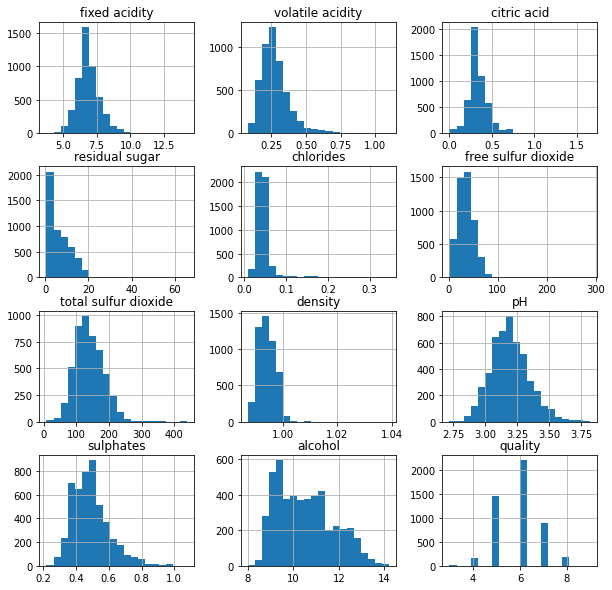

In [40]:
#Implementación por librería:
datA.hist(bins=20,figsize=(10,10)) #(Número de bins, tamaño de la figura)
#Este caso sería datA, o sea dataframe del vino blanco y la lectura sería general.
plt.show() #Se muestra el histograma

Array de bins: [ 0.70728516  1.42920606  2.15112696  2.87304787  3.59496877  4.31688967
  5.03881057  5.76073148  6.48265238  7.20457328  7.92649418  8.64841508
  9.37033599 10.09225689 10.81417779 11.53609869 12.25801959 12.9799405
 13.7018614  14.4237823 ]


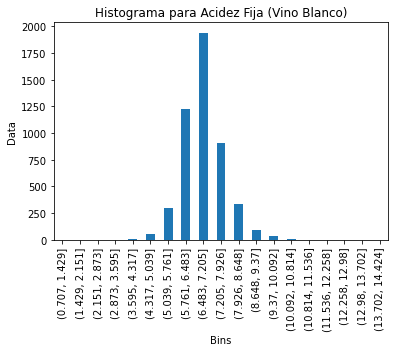

Array de bins: [0.05494285 0.15713855 0.25933425 0.36152996 0.46372566 0.56592136
 0.66811706 0.77031277 0.87250847 0.97470417 1.07689988 1.17909558
 1.28129128 1.38348699 1.48568269 1.58787839 1.6900741  1.7922698
 1.8944655  1.99666121]


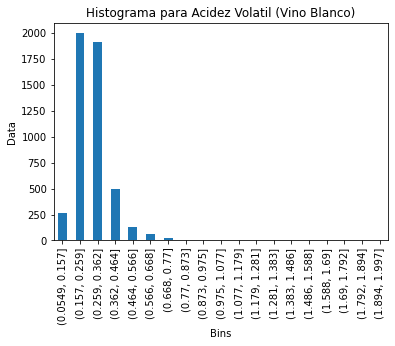

Array de bins: [0.083   0.21185 0.3407  0.46955 0.5984  0.72725 0.8561  0.98495 1.1138
 1.24265 1.3715  1.50035 1.6292  1.75805 1.8869  2.01575 2.1446  2.27345
 2.4023  2.53115]


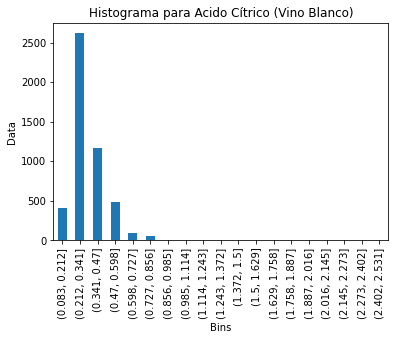

Array de bins: [ 3.28957134  6.46466412  9.63975689 12.81484966 15.98994244 19.16503521
 22.34012799 25.51522076 28.69031353 31.86540631 35.04049908 38.21559186
 41.39068463 44.5657774  47.74087018 50.91596295 54.09105573 57.2661485
 60.44124127 63.61633405]


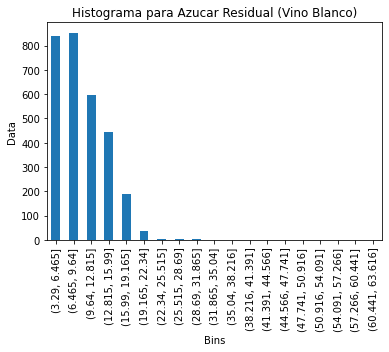

Array de bins: [0.01729357 0.08372246 0.15015135 0.21658024 0.28300914 0.34943803
 0.41586692 0.48229581 0.5487247  0.61515359 0.68158249 0.74801138
 0.81444027 0.88086916 0.94729805 1.01372694 1.08015584 1.14658473
 1.21301362 1.27944251]


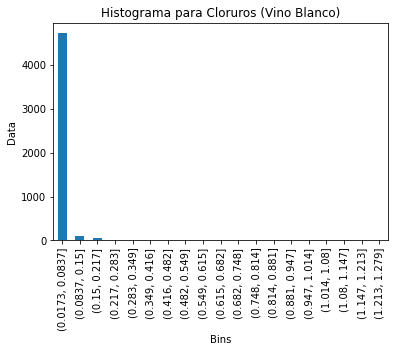

Array de bins: [ 14.44857114  28.22471372  42.0008563   55.77699888  69.55314146
  83.32928404  97.10542662 110.8815692  124.65771178 138.43385436
 152.20999694 165.98613952 179.7622821  193.53842468 207.31456726
 221.09070984 234.86685242 248.642995   262.41913758 276.19528016]


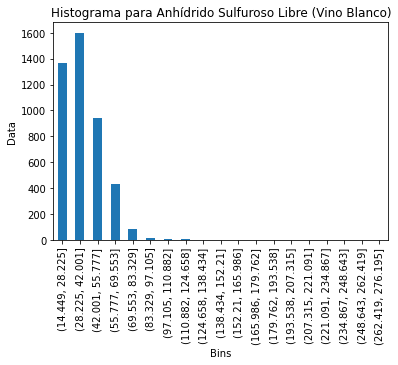

Array de bins: [ 21.99357012  42.93746173  63.88135334  84.82524495 105.76913656
 126.71302817 147.65691978 168.60081139 189.544703   210.48859461
 231.43248622 252.37637783 273.32026944 294.26416105 315.20805266
 336.15194427 357.09583588 378.03972749 398.9836191  419.92751071]


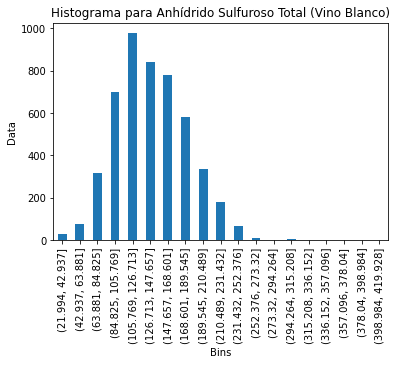

Array de bins: [0.05124378 0.14992537 0.24860695 0.34728854 0.44597013 0.54465172
 0.64333331 0.7420149  0.84069649 0.93937808 1.03805966 1.13674125
 1.23542284 1.33410443 1.43278602 1.53146761 1.6301492  1.72883078
 1.82751237 1.92619396]


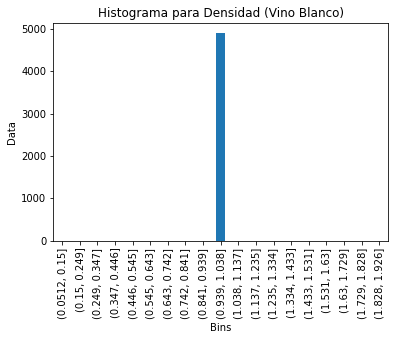

Array de bins: [0.18905675 0.41866066 0.64826456 0.87786847 1.10747238 1.33707629
 1.5666802  1.79628411 2.02588802 2.25549193 2.48509584 2.71469974
 2.94430365 3.17390756 3.40351147 3.63311538 3.86271929 4.0923232
 4.32192711 4.55153102]


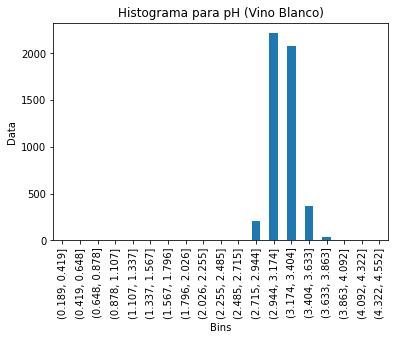

Array de bins: [0.05384283 0.15499351 0.25614419 0.35729488 0.45844556 0.55959624
 0.66074693 0.76189761 0.8630483  0.96419898 1.06534966 1.16650035
 1.26765103 1.36880171 1.4699524  1.57110308 1.67225377 1.77340445
 1.87455513 1.97570582]


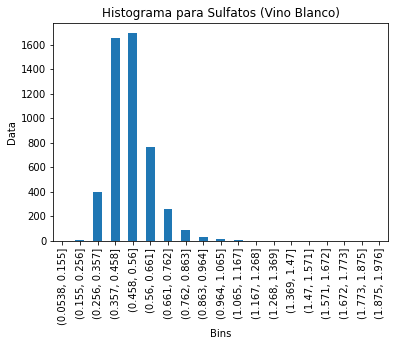

Array de bins: [ 0.70428455  1.42335487  2.14242519  2.86149551  3.58056583  4.29963615
  5.01870647  5.73777679  6.45684711  7.17591743  7.89498775  8.61405807
  9.33312839 10.05219871 10.77126903 11.49033935 12.20940967 12.92847999
 13.64755031 14.36662063]


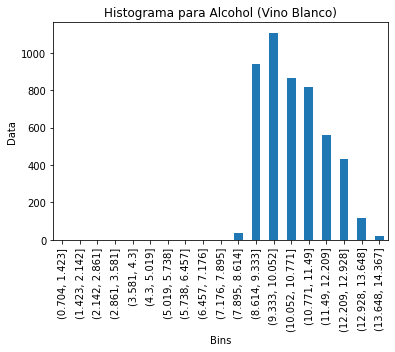

In [41]:
#Implementación de histograma:
def histograma(setdatos,nombrecolumna,nbins):
    #Calculo minimo y maximo de la columna dada:
    mini = min(setdatos) #Valor minimo para el atributo de Acidez Fija
    maxi = max(setdatos) #Valor maximo para el atributo de Acidez Fija
    #nbins = 20 #Numero de bins a calcular según enunciado
    #Realización de los bins:
    bin = maxi-mini/math.sqrt(4898) #diferencia de maximo y minimo / raiz de numero de datos.
    magni = bin/nbins #El tamaño de cada bin
    interbin = np.linspace(magni,bin+1,nbins,endpoint=False) #Array de bordes de cada bin
    total = np.zeros(4898) #Array representante del histograma
    histofal = pd.DataFrame(total) #Se genera como DataFrame para utilizar
    print("Array de bins:", interbin) #Se muestra el array de bins, o sea los que forman el intervalo
    #Separación de los datos de la columna en los bins:
    histofal["atributo"] = setdatos # Se añade columna/atributo de estudio al  histograma de ceros
    histofal["cortes1" + nombrecolumna] = pd.cut(np.array(setdatos),interbin) #Se genera una columna con los cortes
    #Se toma la columna creada y se realiza plot de gráfico de barras
    histofal.groupby("cortes1" + nombrecolumna)["atributo"].count().plot.bar() #Se agrupan y se genera el grafico de barras
    plt.title("Histograma para " + nombrecolumna + " (Vino Blanco)") #Titulo
    plt.xlabel("Bins") #Label general
    plt.ylabel("Data") #Label del atributo
    plt.show() #Se muestra

histograma(acidezfija2,"Acidez Fija",20) 
histograma(acidezvolatil2,"Acidez Volatil",20)
histograma(acidocitrico2,"Acido Cítrico",20)   
histograma(azucaresidual2,"Azucar Residual",20)
histograma(cloruros2,"Cloruros",20)
histograma(sulfurosolibre2,"Anhídrido Sulfuroso Libre",20)         
histograma(sulfurosototal2,"Anhídrido Sulfuroso Total",20)   
histograma(densidad2,"Densidad",20)
histograma(pH2,"pH",20)   
histograma(sulfatos2,"Sulfatos",20)
histograma(alcohol2,"Alcohol",20)   
#histograma(calidad2,'Calidad',20)

**De lo anterior podemos notar que, para el vino blanco:** 

Acido Fijo - Vino Blanco:
Al rededor del 50% de los datos se ven entre 6,4 y 7,2 de sus respectivas medidas. Es un gráfico muy cercano a la distribución normal.

Acidez Volatil - Vino Blanco:
Es una distribución normal con sesgo positivo, o sea hacia la izquierda. Esto parece indicar que el sabor y la acidez volatil están relacionadas.

Acido Citrico - Vino Blanco:
Similar a la acidez volatil, una distribución normal sesgada.

Azucar Residual - Vino Blanco:
Esta podría ser catalogada como distribución normal muy sesgada, pero viendo más en detalle, quizás podría estar relacionada con una distribución exponencial o asociada a una lognormal, esto debido a su sesgo y cómo disminuye sus valores.

Cloruros - Vino Blanco:
Otro caso de distribución similar a anteriores, logrando apreciarse mejor en los gráficos a partir del algoritmo optimizado de las librerías, parecida a una normal.

Sulfuro Libre - Vino Blanco:
Distribución normal.

Sulfuro Total - Vino Blanco:
Distribución normal.

Densidad - Vino Blanco:
Distribución normal.

pH - Vino Blanco:
Distribución normal que se ve muy detallada y sin tanto sesgo en los gráficos optimizados.

Sulfatos - Vino Blanco:
Similar a una distribución normal.

Alcohol - Vino Blanco:
Este caso es curioso ya que pareciera tener 2 picos, es difícil clasificar esta distribución a simple vista.

**COMPARACIONES DE VINO TINTO Y VINO BLANCO:**

Nótese que, confirmando lo visto en las matrices de covarianza, los histogramas nos mostrarían una diferente distribución de los datos de los atributos, como por ejemplos los histogramas del anhídrido sulfuroso libre y total muestran distribuciones distintas entre ambos conjuntos de vinos, esto a su vez nos indica efectos distintos en el sabor ya que las correlaciones son distintas.
Lo mismo sucede con el ácido cítrico y demás, hay otros de iguales características como la densidad, que nos podría indicar que ambos son afectados de manera similar frente a este atributo, esto es debido a su distribución y data.

### **Agrupación simple y gráficos de dispersión:**

Se procede a clasificar los vinos por sus calidades, esto es bueno, normal y malo según exige el enunciado.

**Vino Tinto:**

In [42]:
#Partimos por el Vino Tinto:
#Se genera una columna con las características de clasificación deseada
#Vinos buenos, mayores a 7. Vinos normales, entre 5 y 6. Vinos malos, menores a 5;
datB['calidades'] = ['Vino Bueno:' if x >= 7 else 'Vino Normal:' if 6 >= x >= 5 else 'Vino Malo:' for x in datB['quality']]

#Escondemos las columnas que no son objeto característica, en este caso las descriptivas de la calidad, un atributo derivado.
X = datB.drop(['quality','calidades'], axis = 1)
y = datB['calidades']

#Luego contamos los valores de estee atributo de columnas reagrupadas:
datB['calidades'].value_counts()

Vino Normal:    1319
Vino Bueno:      217
Vino Malo:        63
Name: calidades, dtype: int64

Podemos notar que el total de los vinos se concentran en los de tipo normal, siendo 1319. Por otro lado tenemos 217 vinos buenos y 63 malos.

In [43]:
#Luego encontramos los porcentajes sacando el value_count de 'calidades' dividido por la longitud del atributo 'calidad'
#Este proceso sería básicamente encontrar el procentaje a través de la formula de n/m(100)
100. * datB['calidades'].value_counts() / len(datB.quality)

Vino Normal:    82.489056
Vino Bueno:     13.570982
Vino Malo:       3.939962
Name: calidades, dtype: float64

Podemos notar que hay un ~82% de vinos normales, ~14% de buenos y ~4% de malos.

**Vino Blanco:**

In [44]:
#Partimos por el Vino Tinto:
#Se genera una columna con las características de clasificación deseada
#Vinos buenos, mayores a 7. Vinos normales, entre 5 y 6. Vinos malos, menores a 5;
datA["calidades"] = ["Vino Bueno:" if x >= 7 else "Vino Normal:" if 6 >= x >= 5 else "Vino Malo:" for x in datA['quality']]

#Escondemos las columnas que no son objeto característica, en este caso las descriptivas de la calidad, un atributo derivado.
X = datA.drop(["quality","calidades"], axis = 1)
y = datA["calidades"]

#Luego contamos los valores de estee atributo de columnas reagrupadas:
datA["calidades"].value_counts()

Vino Normal:    3655
Vino Bueno:     1060
Vino Malo:       183
Name: calidades, dtype: int64

Aquí ya notamos el mayor número de muestras que es característico del conjunto de Vino Blanco, asimismo hay una cantidad aparentemente similar de distribución de las calidades.

In [45]:
#Se procede a revisar los porcentajes:
100. * datA["calidades"].value_counts() / len(datA.quality)

Vino Normal:    74.622295
Vino Bueno:     21.641486
Vino Malo:       3.736219
Name: calidades, dtype: float64

Del proceso anterior tenemos que hay un ~74% de vinos normales, ~22% de vinos buenos y un ~4% de vinos malos.

Comparando ambos conjuntos de vinos(tinto y blanco), podemos notar similitudes en su distribución por calidad, pero al mismo tiempo una mayor cantidad de vino bueno en el conjunto de vinos blancos. También hay un casi igual porcentaje de vinos malos y solo la cantidad de vinos normales varía, que en ambos es el subconjunto con mayor cantidad de casos.

**Gráficos de dispersión:**

Dentro de los atributos analizados con distribución normal, tomaremos los primeros dos para el conjunto de vino tinto, estos son acidez fija y acidez volatil.
El enunciado pide poder ver la segregación en base a la calidad del vino, para esto se utilizará la ya generada columna de 'calidades'.

Entonces:

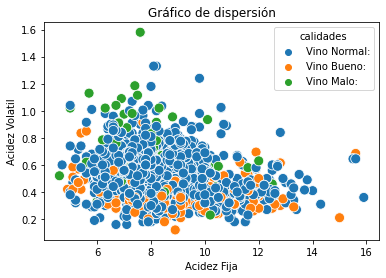

In [46]:
#Se utiliza seaborn para graficar, tomamos las columnas que cumplen ser distribución normal
seab.scatterplot(x="fixed acidity", y="volatile acidity", data=datB, hue = datB.calidades, s=100) #Hue para colores y agrega leyenda
plt.title("Gráfico de dispersión") #Titulo
plt.xlabel("Acidez Fija") #Label general
plt.ylabel("Acidez Volatil") #Label del atributo
plt.show()

Luego, se pide volver a revisar la matriz de covarianza y realizar un gráfico de dispersión con los valores que más alto cumplen su correlación. Esto es;

*Caso de Vino Tinto:*

Acido cítrico y acidez fija con un valor de 0.67 para el vino tinto.

Entonces:

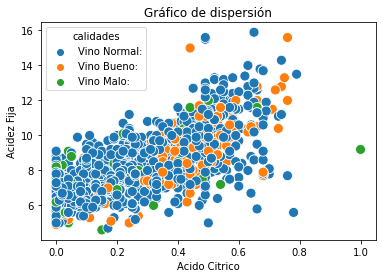

In [47]:
seab.scatterplot(x="citric acid", y="fixed acidity", data=datB, hue = datB.calidades, s=100) #Hue para colores y agrega leyenda
plt.title("Gráfico de dispersión") #Titulo
plt.xlabel("Acido Citrico") #Label general
plt.ylabel("Acidez Fija") #Label del atributo
plt.show()

*Caso del Vino Blanco:*

Densidad y azucar residual con 0.84.

Entonces:

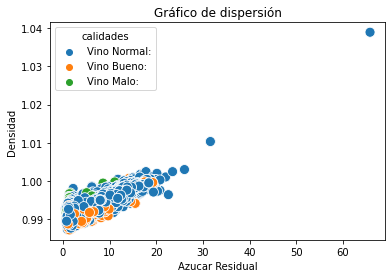

In [48]:
seab.scatterplot(x="residual sugar", y="density", data=datA, hue = datA.calidades, s=100) #Hue para colores y agrega leyenda
plt.title("Gráfico de dispersión") #Titulo
plt.xlabel("Azucar Residual") #Label general
plt.ylabel("Densidad") #Label del atributo
plt.show()

Luego, se nos pide repetir el proceso pero con aquellos atributos que tienen menor absoluto valor de correlación, entonces:

*Caso Vino Tinto:*

Azucar Residual y Acidez Volatil con 0.0019 de valor absoluto

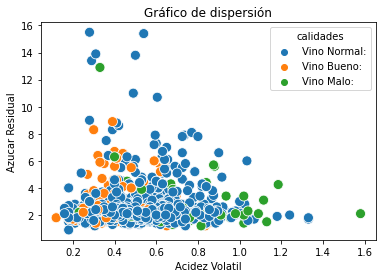

In [49]:
seab.scatterplot(x="volatile acidity", y="residual sugar", data=datB, hue = datB.calidades, s=100) #Hue para colores y agrega leyenda
plt.title("Gráfico de dispersión") #Titulo
plt.xlabel("Acidez Volatil") #Label general
plt.ylabel("Azucar Residual") #Label del atributo
plt.show()

*Caso Vino Blanco:*

Alcohol y Densidad con valor de 0.00062 de valor absoluto.

Por lo tanto:

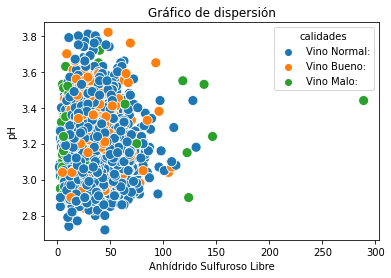

In [50]:
seab.scatterplot(x="free sulfur dioxide", y="pH", data=datA, hue = datA.calidades, s=100) #Hue para colores y agrega leyenda
plt.title("Gráfico de dispersión") #Titulo
plt.xlabel("Anhídrido Sulfuroso Libre") #Label general
plt.ylabel("pH") #Label del atributo
plt.show()

**Comentarios:**
Al analizar desde el primer gráfico de dispersión pedido, podemos ver como el vino malo tiende a tener una alta acidez volatil frente al vino bueno, mientras que los vinos normales están principalmente en puntos intermedios, por su parte, la acidez fija va variando en el recorrido pero aún se encuentran muchos vinos buenos al estar en baja acidez.

Este tipo de gráficos nos da buena idea de la influencia o cómo subconjuntos de interés están organizados frente a otros, todo esto nos puede ser vital al momento de inquirir en un modelo predictivo.

Respecto a los gráficos de dispersión que representan altos y bajos valores absolutos, se puede intuir que se está hablando de alta y baja correlación, y tal cual se puede observar en los gráficos, mientras que los gráficos de alto valor cumplen un patrón donde incluso se podrían hacer regresiones, los de bajo valor están dispersos sin presentar un cambio correlativo, más bien estáticos cerca de un eje.

Igualmente podemos ver que los vinos malos y buenos están distribuidos de maneras distintas en todos los gráficos, esto nos da a entender que existe una relación entre los atributos y sus magnitudes con la propia idea de calidad del vino.


## Parte 3: Métricas de distancia

La información actual corresponde a una base de datos de diamantes. Esta parte tiene como finalidad aplicar los conceptos de métricas de distancia explicadas en clase y visualizar la información.

Entonces, en primera instancia procedemos a abrir la base de datos y analizar:

In [51]:
#Cargar archivos
datC = read_csv('/content/drive/MyDrive/Colab Notebooks/diamonds.csv',sep=",")
#Database definida en matriz
MB = matrix(datC)
print("size matrix: ",MB.shape,"Type datB : ", type(datB), "Type MB : ", type(MB))
[rows,column]=MB.shape
print("Filas :",rows,"Columnas :",column)

size matrix:  (9999, 10) Type datB :  <class 'pandas.core.frame.DataFrame'> Type MB :  <class 'numpy.matrix'>
Filas : 9999 Columnas : 10


Esta database posee 9999 filas por 10 columnas.

Luego, se nos pide introducir y explicar formulas de distancia Euclidiana, Minkowski y Mahalanobis, además de la diferencia entre todas ellas y sus propiedades:

Primeramente tenemos que entender que el concepto de distancia se refiere a la conexión entre 2 puntos, ahí mismo radica la diferencia entre estos 3 approach para llegar de un inicio hacia un final.

1.

La idea más básica es la de distancia Euclidiana, asociada al famoso teorema de pitagoras, o sea una distancia lineal entre dos puntos comunes. Está definida como:

d(A,B) = √((XB – XA)^2)

Esta definición es básicamente una forma básica e intuitiva para producir un camino hacia un punto, en este caso no importa si es A y B o B y A, además de ser positiva siempre. O sea, para aplicar esta distancia, se debe tomar las cordenadas X de puntos A y B y realizar las operaciones como se muestran en la fórmula.

2.

Luego tenemos la distancia Minkowski, esta es la distancia que se debe recorrer entre dos puntos con un trazado perpendicular. De manera simplificada o aproximada, está definida por:

d(A,B) = (Σ(|Bk − Ak|^m))^1/m

Explicada como una generación de la distancia anterior y otras, esta distancia o métrica es una forma de representar cierto espacio a través de vectores con cierta longitud, en su fórmula esto se da a entender a través del uso de la norma de B y A, objetos a estudiar. Asimismo, si el valor de m es 2, se estaría haciendo una distancia euclidiana, en cambio, si m es 1 entonces trataríamos con distancia manhattan.

3.

Por último tenemos la distancia Mahalanobis, esta se fija en la correlación que pueden tener los datos, midiendo así la distancia de un conjunto a un punto común. Esta está definida como:

d(X,μ) = √((X-μ)'Σ^(-1) (X-μ))

De nuevo, la distancia de Mahalanobis mide la distancia de un punto x de una distribución de datos. Esa distribución de datos es descrita por una media y la matriz de covarianza, esto es tal como indica su fórmula donde Σ sería la matriz de covarianza que agrega las correlaciones al juego, mientras que μ es la media y X el punto de estudio.

**Importancia:**

Las métricas de distancia nos permiten cuantificar numéricamente cuán similares son dos puntos al calcular la distancia entre ellos. Existen distintas formas de llegar de un punto a otro y aquellos son las distintas métricas que existen, algunas se ocupan según tal tipo de datos o para cierto tipo de algoritmos. Su importancia es vital para múltiples campos, desde lo que podría ser una aplicación de celular como google maps y su cálculo de distancia/camino hacia un lugar o el reescale de imágenes a través de algoritmos que utilizan estas métricas como base para predecir o generar un modelo de lo que debería ser, además de lo anterior hay usos en machine learning, temáticas de Kernel, etc.

Básicamente, todo un campo de la computación, movimiento en juegos u otros algoritmos de alto impacto, funcionan ocupando estas métricas, de ahí su relevancia en el mundo actual.

**Función para las distancias:**

In [61]:
#Función, aplicamos scipy para poder actuar con más efectividad y simplicidad.

#def distancia()
#caso euclidiano:
#  disteucli = pdist(datC.cut, metric='euclidean')
#  matriz = squareform(disteucli)
#caso minkowski:
#  distmin = cdist(XA, XB, 'minkowski', p)
#caso mahalanobis:
#  distmahala = cdist(XA, XB, 'mahalanobis', VI=None)

#Lamentablemente tuve problemas de tiempo y con la implementación de esta función.

### **Se agrupan los datos según los cut:**

**Caso de valores X**

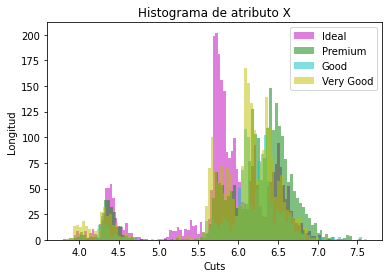

In [52]:
#Agrupación de datos de X en los 4 subconjuntos de cut mencionados:
Ideal = datC.loc[datC.cut=="Ideal", "x"] #Se ocupa loc para generar una sección y cut para tomar los datos acordes.
Premium = datC.loc[datC.cut=="Premium", "x"]
Bueno = datC.loc[datC.cut=="Good", "x"]
MuyBueno = datC.loc[datC.cut=="Very Good", "x"]
#No se añade el corte 'fair' ya que no es explicitado en el enunciado
#Pero aquí está en caso de:
#Decente = datC.loc[datC.cut=="Fair", "x"]

#Para argumentos de longitud variable:
kwargs = dict(alpha=0.5, bins=100)
#Se toma cada 'Cut' para poder ser graficado en histograma:
plt.hist(Ideal, **kwargs, color="m", label="Ideal") #Se da color para poder distinguir, M de magenta
plt.hist(Premium, **kwargs, color="g", label="Premium") #G de green, verde.
plt.hist(Bueno, **kwargs, color="c", label="Good") #C de cyan
plt.hist(MuyBueno, **kwargs, color="y", label="Very Good") #Y de Yellow, amarillo.
#plt.hist(Decente, **kwargs, color="r", label="Fair") #R de red, rojo.
plt.gca().set(title="Histograma de atributo X", xlabel="Cuts", ylabel="Longitud") #Título y label
plt.legend();

**Caso de valores Y**

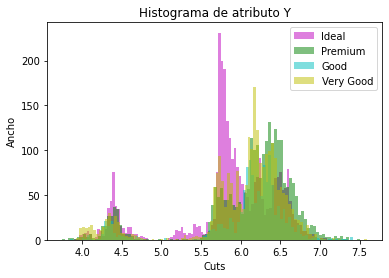

In [62]:
#Agrupación de datos de X en los 4 subconjuntos de cut mencionados:
Ideal2 = datC.loc[datC.cut=="Ideal", "y"] #Se ocupa loc para generar una sección y cut para tomar los datos acordes.
Premium2 = datC.loc[datC.cut=="Premium", "y"]
Bueno2 = datC.loc[datC.cut=="Good", "y"]
MuyBueno2 = datC.loc[datC.cut=="Very Good", "y"]
#No se añade el corte 'fair' ya que no es explicitado en el enunciado
#Pero aquí está en caso de:
#Decente2 = datC.loc[datC.cut=="Fair", "y"]

#Para argumentos de longitud variable:
kwargs = dict(alpha=0.5, bins=100)
#Se toma cada 'Cut' para poder ser graficado en histograma:
plt.hist(Ideal2, **kwargs, color="m", label="Ideal") #Se da color para poder distinguir, M de magenta
plt.hist(Premium2, **kwargs, color="g", label="Premium") #G de green, verde.
plt.hist(Bueno2, **kwargs, color="c", label="Good") #C de cyan
plt.hist(MuyBueno2, **kwargs, color="y", label="Very Good") #Y de Yellow, amarillo.
#plt.hist(Decente2, **kwargs, color="r", label="Fair") #R de red, rojo.
plt.gca().set(title="Histograma de atributo Y", xlabel="Cuts", ylabel="Ancho") #Título y label
plt.legend();

In [86]:
#Matriz de distancia utilizando scipy:

#Pruebas:
#from scipy.spatial import distance_matrix
#distance_matrix([datC.x, datC.y],[datC.y, datC.z])

#Utilizando función de pdist para hacer una matriz de distancia euclideana como prueba:
dist = pdist(datC[['x', 'y']], 'euclidean')
pd.DataFrame(squareform(dist))
#Aquí se ocuparon los valores x e y.

,0,1,2,3,4,5,6,7,8,9,...,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998
0,0.000000,0.152315,0.134536,0.353553,0.537587,0.022361,0.000000,0.176918,0.215407,0.086023,...,4.455132,3.931921,3.868656,3.451145,3.394584,3.394378,3.366571,3.422864,3.528810,3.374567
1,0.152315,0.000000,0.280179,0.498197,0.680147,0.130000,0.152315,0.324500,0.063246,0.237065,...,4.596194,4.072935,4.009352,3.592102,3.535534,3.535562,3.507278,3.563818,3.669891,3.514669
2,0.134536,0.280179,0.000000,0.219317,0.403113,0.155563,0.134536,0.044721,0.341321,0.053852,...,4.320706,3.797486,3.734193,3.316700,3.260138,3.259954,3.232105,3.288419,3.394378,3.240062
3,0.353553,0.498197,0.219317,0.000000,0.184391,0.374833,0.353553,0.176918,0.558032,0.269072,...,4.101609,3.578407,3.515181,3.097644,3.041085,3.040855,3.013105,3.069365,3.175295,3.021208
4,0.537587,0.680147,0.403113,0.184391,0.000000,0.558659,0.537587,0.361248,0.738783,0.453431,...,3.917601,3.394378,3.331081,2.913589,2.857026,2.856851,2.828993,2.885308,2.991271,2.836988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.394378,3.535562,3.259954,3.040855,2.856851,3.415509,3.394378,3.217717,3.592353,3.309743,...,1.060754,0.537587,0.475079,0.058310,0.014142,0.000000,0.040000,0.031623,0.134536,0.067082
9995,3.366571,3.507278,3.232105,3.013105,2.828993,3.387639,3.366571,3.190000,3.563846,3.282073,...,1.089036,0.565862,0.502096,0.086023,0.031623,0.040000,0.000000,0.058310,0.164012,0.036056
9996,3.422864,3.563818,3.288419,3.069365,2.885308,3.443966,3.422864,3.246244,3.620497,3.338293,...,1.032376,0.509117,0.445982,0.028284,0.028284,0.031623,0.058310,0.000000,0.106301,0.070000
9997,3.528810,3.669891,3.394378,3.175295,2.991271,3.549930,3.528810,3.352163,3.726620,3.444198,...,0.926337,0.403113,0.340588,0.078102,0.134536,0.134536,0.164012,0.106301,0.000000,0.165529


Se puede ver a través de esta matriz de distancia que si bien no es lo esperado, se puede notar el trabajo entre las variables y como estas se ordenan según su distancia euclidiana, formando la relación, y cambiando la métrica a 9999x9999, cosa que es correcta.

## Parte 4: Discusión y Conclusiones del trabajo

En el presente trabajo, muy extenso y laborioso, se pudo ver el tratamiento de dataframes desde el inicio, cómo leer y obtener datos básicos previo a su manipulación, de la misma manera y gracias a aquellos análisis preliminares, se pudo notar que existen casos a tener en cuenta como el tipo de dato en tabla, si es que hay datos faltantes o no, chequear la cantidad de datos que se trabajan, punto clave para poder optimizar o saber con qué se puede trabajar.

Por otro lado, se pudo ver también el cómo las correlaciones sirven y son influyentes al momento de buscar/minar información útil de información en tabla, gracias a una matriz de covarianza o de correlación, se puede entender que atributos poseen mayor grado de linealidad o al contrario, ser inversos. También  está el caso de las formas de visualizar los datos, los histograma pueden ser muy útiles al momento de ver cómo se comportan los datos en el recorrido, es decir la distribución, con ella se confirma o aclaran inferencias que por un análisis de correlación no siempre quedan 100% claras, la mirada y separación de los datos o su agrupación también es útil para supeditar la mirada hacia objetos de interés.

Vale destacar la labor que ofrecen muchas librerías con algoritmos eficientemente implementados que pueden ahorrar horas de trabajo, y esto se pudo comprobar al realizar la implementación de funciones que den medidas de tendencia vs la función de una línea que traen estas librerías y que entregan una gran cantidad de información valiosa y ordenada.

En términos específicos, se pudo notar la diferencia entre gráficos de dispersión de atributos no correlacionados, igualmente se entrevio posibles ideas de modelo predictivo durante la formación de histogramas, así como también la diferencia entre las variables de calidad de ambos conjuntos de vinos, esto debido sus diferentes correlaciones, cosa que influye en su sabor.

Se notó la importancia de las métricas de distancia y como estas ayudan a dar con formas de conectar puntos en el espacio y dar forma a distintas cosas que utilizamos, entre estas muchos algoritmos de diversos campos de estudio.

Durante el trabajo existieron muchas limitantes de tiempo, internet y otras temáticas, además de la propia dificultad, pero fue un trabajo entretenido, la realización en la plataforma de colab permite un entorno más límpido, o sea obliga a trabajar bajo secciones y mantener cierta estructura, los tiempos de carga y la libertad de aplicación del código la hacen una gran plataforma de trabajo, lo mismo con la posibilidad de tener todo en la nube y no tener que instalar librerías, aunque el usuario o coder queda amarrado al uso de internet.

# **Bibliografía:**
*(Textos que se utilizaron de guía, también se revisó conceptos en wikipedia)

1. Nong, Y. (2003). THE HANDBOOK OF DATA MINING. The Warsaw University of Technology. http://home.elka.pw.edu.pl/~ptrojane/books/Handbook.Of.Data.Mining.pdf

2. Rachamadugu, R. T. (2019, 26 enero). Histogram & Bar Plots in R for Machine Learning. Medium. https://medium.com/@ravitheja_29/histogram-bar-plots-in-r-32271123be67

3. Cuadras, C. M. (1989). Distancias Estadísticas. Universitat de Barcelona. http://halweb.uc3m.es/esp/Personal/personas/dpena/publications/castellano/1989EE_cuadras_coment.pdf